# We construct a HMM to learn the velocity settings as hidden states

We also use the improbable transition counter for thresholding

In [2]:
import numpy as np
import pickle 
trajectory_file = open("trajectories.pyo", "rb")
trajs = pickle.load(trajectory_file)
y_vec = np.array(trajs['y_vec'])
t_vec = np.array(trajs['t_vec'])
v_vec = np.array(trajs['v_vec'])
# remove the mean component from y_vec 
y_mean = np.array(trajs['y_mean'])
del trajs
trajectory_file.close()
del trajectory_file

/var/folders/cz/fwskdlzd1y90jrpkhcwcbctw0000gn/T/ipykernel_3726/3162714575.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  v_vec = np.array(trajs['v_vec'])


In [3]:
for i,v in enumerate(v_vec):
    v_vec[i] = np.array(v[0:100])
v_vec = np.stack(v_vec, axis=0)

Plotting some velocity graph, we shall construct a HMM to learn this shit

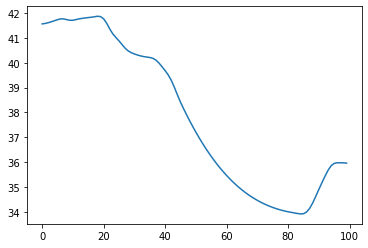

In [26]:
from matplotlib import pyplot as plt
plt.plot(np.arange(100),v_vec[0,:])

Create training data for the HMM from hmmlearn

In [5]:
training_data = v_vec.copy()
training_length = [v_vec[i].shape[0] for i in range(v_vec.shape[0])]
training_data = training_data.flatten().reshape((-1,1))

In [7]:
# start training the HMM model 
from hmmlearn import hmm 
np.random.seed(42)

model = hmm.GaussianHMM(n_components=10, covariance_type="full", n_iter=1000)
# model.startprob_ = np.array([0.2, 0.2, 0.2])
# model.transmat_ = np.array([[0.7, 0.2, 0.1],
#                             [0.3, 0.5, 0.2],
#                             [0.3, 0.3, 0.4]])
# model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]]) # emission model
# model.covars_ = np.tile(np.identity(2), (3, 1, 1)) # emission model
model.fit(training_data, training_length)
model.monitor_

ConvergenceMonitor(
    history=[-82077.68783736661, -74571.55965291431, -69750.2771348256, -64142.17080496999, -58988.66347341907, -53433.08982749091, -48720.976260268595, -43958.1690128379, -39953.58428243994, -38601.308478980005, -38495.823302823934, -38436.732484241285, -38369.115584799154, -38298.749154718156, -38241.055900463, -38188.42106839883, -38130.86521818989, -38067.841332240074, -37997.55476460305, -37940.0850611859, -37893.29544344172, -37857.29008623429, -37830.25771958441, -37806.75812977045, -37788.42717867294, -37773.489985408654, -37760.45158820658, -37749.80532455075, -37739.64592129731, -37728.323835668205, -37716.64262654059, -37706.236603795805, -37698.03180554356, -37691.26162569768, -37685.30917595083, -37679.635778198885, -37674.07220165005, -37669.14316422788, -37665.30355069272, -37662.46912945882, -37660.40721792915, -37658.87030526291, -37657.652320713656, -37656.58264430819, -37655.43840928636, -37653.7215099355, -37650.84255630851, -37647.91889661827, -

Total iterations  72
Convergence?  True


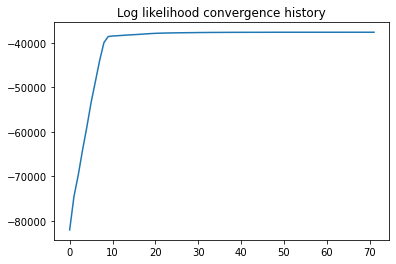

In [13]:
plt.plot(np.array(list(model.monitor_.history)))
plt.title('Log likelihood convergence history')
print('Total iterations ', model.monitor_.iter)
print('Convergence? ', model.monitor_.converged)

Testing a sample velocity profile

The score is -172.77


Text(0.5, 1.0, 'Hidden state sequence')

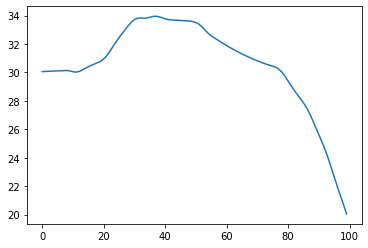

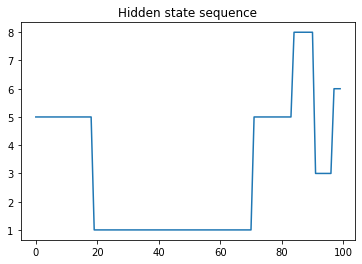

In [16]:
sample_velocity_profile = v_vec[12,:].copy()
plt.figure()
plt.plot(sample_velocity_profile)
plt.figure()
hidden_states = model.predict(sample_velocity_profile.reshape(-1,1))
print('The score is {:.2f}'.format(model.score(sample_velocity_profile.reshape(-1,1))))
plt.plot(hidden_states)
plt.title('Hidden state sequence')

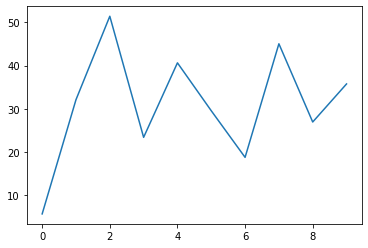

In [28]:
plt.plot(model.means_)